In [53]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
import matplotlib.pyplot as plt

# train and query 3 layer neural networks

`Initialisatie`. We weten dat we het aantal invoer-, verborgen- en uitvoerlaagnodes moeten instellen. Dit bepaalt de vorm en grootte van het neurale netwerk. In plaats van ze in steen vast te leggen, laat ik ze instellen wanneer ik een nieuw neurale netwerkobject maak met behulp van parameters.

`Weights`. De volgende stap is het creëren van het netwerk van nodes en verbindingen. Het belangrijkste onderdeel van het netwerk zijn de gewichten van de verbindingen. Ze worden gebruikt om het signaal dat voorwaarts wordt doorgegeven te berekenen, de fout die achterwaarts wordt doorgegeven, en het zijn de gewichten van de verbindingen zelf die worden verfijnd in een poging om het netwerk te verbeteren.

De functie numpy.random.normal() is nuttig voor het genereren van gewichten omdat het ons in staat stelt om willekeurige getallen te trekken uit een normale verdeling. Bij het initialiseren van de gewichten in een neuraal netwerk is het belangrijk om een zekere mate van willekeur te behouden. Door gebruik te maken van een normale verdeling kunnen we gewichten genereren die rond het gemiddelde van nul gecentreerd zijn, wat een goed startpunt is voor het optimaliseren van het netwerk.

Daarnaast maakt het gebruik van de standaarddeviatie, die gerelateerd is aan het aantal inkomende verbindingen naar een knooppunt, het mogelijk om de variabiliteit van de gewichten te regelen. Door de standaarddeviatie te berekenen als 1/√(aantal inkomende verbindingen), zorgen we ervoor dat knooppunten met meer inkomende verbindingen een kleinere standaarddeviatie hebben, waardoor de invloed van elke verbinding evenredig verdeeld wordt.

Door deze aanpak kunnen we een set van willekeurige gewichten genereren die geschikt zijn voor het trainen van ons neurale netwerk en die de mogelijkheid bieden om de prestaties van het netwerk te verbeteren tijdens het leerproces.

`Querying`-functie past matrixvermenigvuldiging toe om de signalen door de lagen van het netwerk te sturen, waarbij de gewichtsmatiging en de sigmoid-activatiefunctie worden toegepast. Dit proces wordt herhaald voor de verborgen laag en de uiteindelijke outputlaag. Samengevoegd zorgen deze stappen ervoor dat het neurale netwerk in staat is om de invoer correct te verwerken en betekenisvolle uitvoer te genereren. Ze spelen een cruciale rol in het vermogen van het netwerk om te leren, patronen te herkennen en voorspellingen te doen op basis van de gegeven invoer.

`Training` proces bestaat uit twee delen:

1. Het berekenen van de output voor een gegeven trainingsvoorbeeld: Dit is vergelijkbaar met wat we zojuist hebben gedaan met de `query()`-functie. Het neurale netwerk neemt de invoer van het trainingsvoorbeeld en berekent de output door de signalen door de lagen van het netwerk te sturen. Dit geeft ons de voorspelde output van het netwerk voor dat specifieke trainingsvoorbeeld.

2. Het vergelijken van de berekende output met de gewenste output: Nadat we de voorspelde output hebben verkregen, vergelijken we deze met de gewenste output die bij het trainingsvoorbeeld hoort. Dit stelt ons in staat om het verschil, ook wel de fout genoemd, tussen de voorspelde output en de gewenste output te bepalen. Deze fout is een maatstaf voor hoe goed het netwerk presteert op het trainingsvoorbeeld.

Met behulp van de fout kunnen we vervolgens de gewichten in het netwerk bijwerken. Door het verschil tussen de voorspelde output en de gewenste output te gebruiken, kunnen we de gewichten aanpassen om de prestaties van het netwerk te verbeteren. Dit wordt gedaan door technieken zoals backpropagatie, waarbij de fout wordt teruggevoerd door het netwerk en gebruikt om de gewichten in de verborgen lagen en de outputlaag aan te passen.

   Door het vermenigvuldigen van matrices van fouten, uitvoersignalen en transposities van signalen, worden de gewichten tussen de lagen van het netwerk aangepast. Dit proces staat bekend als backpropagatie









In [39]:
class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Set aantal knooppunten in elke laag
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # Gewichtsmatrices, wih en who
        # Gewichten in de matrices zijn w_i_j, waarbij de link van knooppunt i naar knooppunt j in de volgende laag gaat
        # w11 w21
        # w12 w22, enz.
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, 0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, 0.5), (self.onodes, self.hnodes))

        # Learning rate
        self.lr = learningrate

        # Activatiefunctie is de sigmoid-functie
        # sigmoid = 1 / 1 + e^-t
        self.activation_function = lambda x: 1 / (1 + np.exp(-x))

    def train(self, inputs_list, targets_list):
        # Converteer invoerlijst naar een 2D-array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T

        # ------------------------
        # Feedforward-proces
        # ------------------------

        # Bereken signalen naar de verborgen laag
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Bereken de signalen die uit de verborgen laag komen
        hidden_outputs = self.activation_function(hidden_inputs)

        # Bereken signalen naar de uiteindelijke uitvoerlaag
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Bereken de signalen die uit de uiteindelijke uitvoerlaag komen
        final_outputs = self.activation_function(final_inputs)

        # ------------------------
        # Backpropagatie-proces
        # ------------------------

        # Bereken de fout in de uitvoerlaag (output_errors)
        output_errors = targets - final_outputs

        # Bereken de fout in de verborgen laag (hidden_errors)
        hidden_errors = numpy.dot(self.who.T, output_errors)

        # Update de gewichten tussen de verborgen en uitvoerlaag (self.who)
        # Gewichten worden geüpdatet op basis van de delta-regel van sigmoid functie
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), numpy.transpose(hidden_outputs))

        # Update de gewichten tussen de invoer en verborgen laag (self.wih)
        # Gewichten worden geüpdate op basis van de delta-regel van sigmoid functie
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), numpy.transpose(inputs))

    def query(self, inputs_list):
        # Converteer invoerlijst naar een 2D-array
        inputs = numpy.array(inputs_list, ndmin=2).T

        # ------------------------
        # Feedforward-proces
        # ------------------------

        # Bereken signalen naar de verborgen laag
        hidden_inputs = numpy.dot(self.wih, inputs)
        # Bereken de signalen die uit de verborgen laag komen
        hidden_outputs = self.activation_function(hidden_inputs)

        # Bereken signalen naar de uiteindelijke uitvoerlaag
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # Bereken de signalen die uit de uiteindelijke uitvoerlaag komen
        final_outputs = self.activation_function(final_inputs)

        # Geef de uiteindelijke uitvoer van het neurale netwerk terug
        return final_outputs


De term `(output_errors * final_outputs * (1.0 - final_outputs))` berekent de delta's voor de uitvoerlaag op basis van de fout, de activaties en de afgeleide van de sigmoid-functie. Vervolgens wordt dit gecombineerd met de activaties van de verborgen laag hidden_outputs en vermenigvuldigd met de leersnelheid self.lr om de gewichtsupdates te bepalen.

Waarom is dit een goede manier van `Backpropagatie`
- Deze manier van backpropagatie is effectief omdat het de fouten van de uitvoerlaag terugvoert naar de verborgen lagen, waardoor het neurale netwerk kan leren en de gewichten kan aanpassen om de voorspellingen te verbeteren.

Waarom ik gekozen heb voor non-linear `Feedforward`
- Non-linear kan beter complexe patronen herkennen dan linear. Daarom heb ik gekozen voor de sigmoid activatiefunctie, want deze is non-linear.

[Aantekeningen](https://gitlab.fdmci.hva.nl/chintss/minor-logboek-aai-2/-/blob/main/python_nn/NNNotes.md)

In [40]:
input_nodes = 3
h_nodes = 3
o_nodes = 3

learning_rate = 0.3

n = neuralNetwork(input_nodes,h_nodes,o_nodes,learning_rate)

In [41]:
n.query([1.0,0.5,-1.5])

array([[0.71223492],
       [0.28374021],
       [0.19808185]])

In [42]:
import numpy

# Define the neural network architecture and parameters
input_nodes = 3
hidden_nodes = 4
output_nodes = 1
learning_rate = 0.1

# Create an instance of the neural network
nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Define the training data
inputs = numpy.array([[0.1, 0.2, 0.3],
                      [0.4, 0.5, 0.6],
                      [0.7, 0.8, 0.9]])

targets = numpy.array([[0.5],
                       [0.7],
                       [0.2]])

# Train the neural network
for i in range(1000):  # Perform 1000 training iterations
    nn.train(inputs, targets)

# Test the trained network
test_input = [0.3, 0.4, 0.5]
output = nn.query(test_input)
print("Output:", output)


Output: [[0.48566667]]


In [43]:
nn.query([0.1, 0.2, 0.3])

array([[0.51871615]])

In [44]:
nn.query([0.4, 0.5, 0.6])

array([[0.46471092]])

In [45]:
nn.query([0.7, 0.8, 0.9])

array([[0.40107798]])

Ik ga het NN trainen om de MNIST dataset. Ik ga ervan uit dat het NN duidelijke cijfers goed zal voorspellen. Ik ga het model 20 epochs geven.

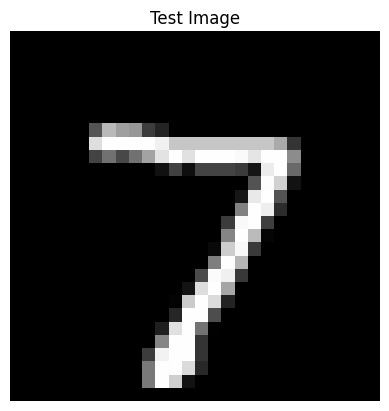

In [52]:
# Display the test image
plt.imshow(test_images[0], cmap='gray')
plt.title("Test Image")
plt.axis('off')
plt.show()

Deze foto is een duidelijke 7, hopelijk herkent het NN het ook zo.

In [48]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the input images
train_images = train_images.reshape((60000, 28 * 28))  # Reshape to a 2D array
train_images = train_images.astype('float32') / 255  # Normalize pixel values between 0 and 1

# Convert the labels to one-hot encoded vectors
train_labels = np.eye(10)[train_labels]  # Convert labels to one-hot encoded vectors

# Define the neural network architecture and parameters
input_nodes = 28 * 28  # Input size based on the MNIST image shape
hidden_nodes = 64  # Arbitrary number of hidden nodes
output_nodes = 10  # Output size for 10 digit classes
learning_rate = 0.1

# Create an instance of the neural network
nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

# Train the neural network
for i in range(20):  # Perform 1000 training iterations
    print(i)
    for image, label in zip(train_images, train_labels):
        nn.train(image, label)

# Test the trained network
test_image = test_images[0].flatten()  # Flatten the input image
output = nn.query(test_image)
predicted_label = np.argmax(output)  # Get the index of the highest output activation
print("Predicted Label:", predicted_label)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
Predicted Label: 7


Correcte prediction.

# neuralNetwork met CrossEntropy

## Cross-entropy formule:
![Cross-Entropy Loss Formule](https://latex.codecogs.com/svg.latex?%5Ctext%7BLoss%7D%20%3D%20-%5Csum%20%28%20%5Cmathbf%7Bt%7D%20%5Clog%28%5Cmathbf%7By%7D%29%20+%20%281%20-%20%5Cmathbf%7Bt%7D%29%20%5Clog%281%20-%20%5Cmathbf%7By%7D%29%20%29)

Voor de rest is het NN hetzelfde. Alleen loss function toegevoegd.


In [12]:
import numpy as np
import scipy.special

class neuralNetwork:
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # Set aantal knooppunten in elke laag
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes

        # Gewichtsmatrices, wih en who
        # Gewichten in de matrices zijn w_i_j, waarbij de link van knooppunt i naar knooppunt j in de volgende laag gaat
        # w11 w21
        # w12 w22, enz.
        self.wih = np.random.normal(0.0, pow(self.hnodes, 0.5), (self.hnodes, self.inodes))
        self.who = np.random.normal(0.0, pow(self.onodes, 0.5), (self.onodes, self.hnodes))

        # Learning rate
        self.lr = learningrate

        # Activatiefunctie is de sigmoid-functie
        # sigmoid = 1 / 1 + e^-t
        self.activation_function = lambda x:  1 / (1 + np.exp(-x))

    def feedforward(self, inputs):
        # Bereken signalen naar de verborgen laag
        hidden_inputs = np.dot(self.wih, inputs)
        # Bereken de signalen die uit de verborgen laag komen
        hidden_outputs = self.activation_function(hidden_inputs)

        # Bereken signalen naar de uiteindelijke uitvoerlaag
        final_inputs = np.dot(self.who, hidden_outputs)
        # Bereken de signalen die uit de uiteindelijke uitvoerlaag komen
        final_outputs = self.activation_function(final_inputs)

        return hidden_outputs, final_outputs

    def train(self, inputs_list, targets_list):
        # Convert input and target lists to 2D arrays
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # Feedforward
        hidden_outputs, final_outputs = self.feedforward(inputs)

        epsilon = 1e-10
        loss = -np.sum(targets * np.log(final_outputs + epsilon) + (1 - targets) * np.log(1 - final_outputs + epsilon))

        # Backpropagation

        # Calculate the output errors
        output_errors = targets - final_outputs

        # Calculate the hidden layer errors
        hidden_errors = np.dot(self.who.T, output_errors)

        # Update the weights between the hidden and output layers
        self.who += self.lr * np.dot((output_errors * final_outputs * (1.0 - final_outputs)),
                                     np.transpose(hidden_outputs))

        # Update the weights between the input and hidden layers
        self.wih += self.lr * np.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)),
                                     np.transpose(inputs))

        return loss


    def query(self, inputs_list):
        # Converteer invoerlijst naar een 2D-array
        inputs = np.array(inputs_list, ndmin=2).T

        # ------------------------
        # Feedforward-proces
        # ------------------------

        _, final_outputs = self.feedforward(inputs)

        # Geef de uiteindelijke uitvoer van het neurale netwerk terug
        return final_outputs

    def loss(self, inputs_list, targets_list):
        # Converteer invoerlijst naar een 2D-array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(targets_list, ndmin=2).T

        # ------------------------
        # Feedforward-proces
        # ------------------------

        _, final_outputs = self.feedforward(inputs)

        # Bereken de cross-entropy loss
        loss = -np.sum(targets * np.log(final_outputs) + (1 - targets) * np.log(1 - final_outputs))

        return loss


## Trainen en plotten van LOSS - CrossEntropy

Iteration: 0 Average Loss: 4.610531213885091
Iteration: 1 Average Loss: 1.7015316706625132
Iteration: 2 Average Loss: 1.3175933846608585
Iteration: 3 Average Loss: 1.1293859840074714
Iteration: 4 Average Loss: 1.0011885789953883
Iteration: 5 Average Loss: 0.9235844041035488
Iteration: 6 Average Loss: 0.8600511405686044
Iteration: 7 Average Loss: 0.8090073113968995
Iteration: 8 Average Loss: 0.7740583459627601
Iteration: 9 Average Loss: 0.7406726045479499
Iteration: 10 Average Loss: 0.7111708594345115
Iteration: 11 Average Loss: 0.6875065091521851
Iteration: 12 Average Loss: 0.6670064719492469
Iteration: 13 Average Loss: 0.6476062846849163
Iteration: 14 Average Loss: 0.6285816291404537
Iteration: 15 Average Loss: 0.6152336753511284
Iteration: 16 Average Loss: 0.5999699179250322
Iteration: 17 Average Loss: 0.5851312601538509
Iteration: 18 Average Loss: 0.5728173254614318
Iteration: 19 Average Loss: 0.5658708350211066
Predicted Label: 7


/var/folders/2p/m8pz9vjx3zn73ndc2lz_zb0w0000gn/T/ipykernel_67449/385956504.py:23: RuntimeWarning: overflow encountered in exp
  self.activation_function = lambda x:  1 / (1 + np.exp(-x))


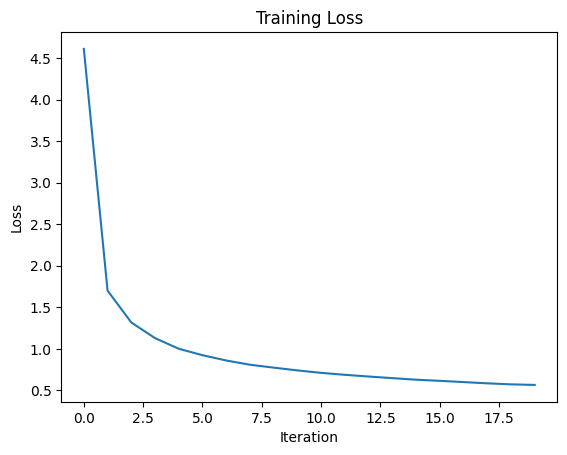

In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape and normalize the input images
train_images = train_images.reshape((60000, 28 * 28))  # Reshape to a 2D array
train_images = train_images.astype('float32') / 255  # Normalize pixel values between 0 and 1

# Convert the labels to one-hot encoded vectors
train_labels = np.eye(10)[train_labels]  # Convert labels to one-hot encoded vectors

# Define the neural network architecture and parameters
input_nodes = 28 * 28  # Input size based on the MNIST image shape
hidden_nodes = 64  # Arbitrary number of hidden nodes
output_nodes = 10  # Output size for 10 digit classes
learning_rate = 0.1

# Create an instance of the neural network
nn = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)
# Create empty lists to store the loss values
loss_values = []

# Train the neural network
for i in range(20):  # Perform 20 training iterations
    total_loss = 0

    for image, label in zip(train_images, train_labels):
        loss = nn.train(image, label)
        total_loss += loss

    average_loss = total_loss / len(train_images)
    print("Iteration:", i, "Average Loss:", average_loss)
    loss_values.append(average_loss)

# Test the trained network
test_image = test_images[0].flatten()  # Flatten the input image
output = nn.query(test_image)
predicted_label = np.argmax(output)  # Get the index of the highest output activation
print("Predicted Label:", predicted_label)


# Plot the loss values
plt.plot(loss_values)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

Het dalen van de loss (van 4.5 naar 0.57) tijdens het trainen van een neuraal netwerk geeft aan dat het netwerk beter wordt in het maken van accurate voorspellingen. De loss is een maatstaf voor het verschil tussen de voorspelde uitvoer van het netwerk en de werkelijke doelwaarden. Het doel van het trainen is om deze loss te minimaliseren.

Een hoge initiële loss van 4.5 geeft aan dat het netwerk aanvankelijk relatief onnauwkeurige voorspellingen maakt. Naarmate het trainingsproces vordert, past het netwerk zijn gewichten en biases aan om de voorspellingen beter af te stemmen op de gewenste doelwaarden. Dit resulteert in een lagere loss-waarde van 0.57, wat aangeeft dat de voorspellingen van het netwerk dichter bij de werkelijke doelwaarden liggen.
